# Subject 1:
#### Predict the price of the car based on various features such as car name, fuel type, car length, engine type, horse power, mileage, etc., to name a few. Use the Data Dictionary car prices to know about the features and their datatypes in the dataset. Use the Car Price dataset, which contains information about car and apply linear regression to predict the price of the car based on various features. 

## 1. Exploratory Data Analysis (EDA)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
df = pd.read_csv("C:/Users/thoma/Downloads/Car Price Prediction/Car Price Prediction/Car Price Prediction.csv")


print(df.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

## 2. Data Cleaning

In [2]:
# Check for missing values
print(df.isnull().sum())

# Select features, including both numerical and categorical
selected_features = ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
                     'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
                     'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
                     'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
                     'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


df = df[selected_features]


df = pd.get_dummies(df, drop_first=True)


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


## 3. Data Splitting
We will split the dataset into training and testing sets to evaluate our model's performance on unseen data.

In [3]:

X = df.drop('price', axis=1)
y = df['price']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Building the Model
We will build a Linear Regression model using the training set.

In [4]:

linear_regression_model = LinearRegression()
# Train the model
linear_regression_model.fit(X_train, y_train)


y_pred = linear_regression_model.predict(X_test)

# Calculate metrics
mean_absolute_error_value = mean_absolute_error(y_test, y_pred)
mean_squared_error_value = mean_squared_error(y_test, y_pred)
r2_score_value = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mean_absolute_error_value}')
print(f'Mean Squared Error: {mean_squared_error_value}')
print(f'R² Score: {r2_score_value}')


Mean Absolute Error: 7280.66779311137
Mean Squared Error: 176760096.86095348
R² Score: -1.2390561677927034


## 5. Save Model

In [5]:
# Save the model to a file
joblib.dump(linear_regression_model, 'car_price_prediction_model.pkl')

['car_price_prediction_model.pkl']

## 6. Plot linear regression
we try to determine the price of two cars generated at the same time and plot the linear regression. 

Predicted price for car 1: 218959.75041279095
Predicted price for car 2: 227325.60080218237


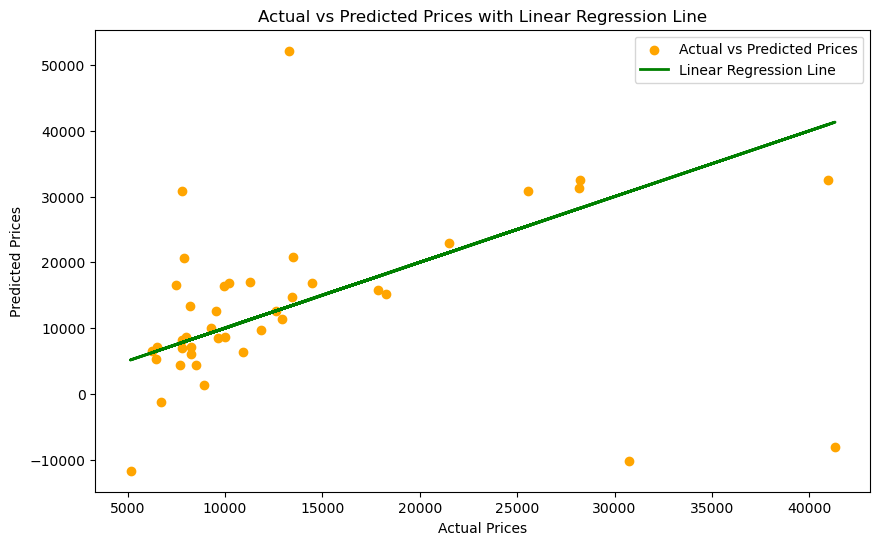

In [7]:
# Predicting the price of two new cars
new_cars_data = [
    {
        'car_ID': 1003,
        'symboling': 0,
        'CarName': 'honda',
        'fueltype': 'gas',
        'aspiration': 'std',
        'doornumber': 'four',
        'carbody': 'wagon',
        'drivewheel': 'fwd',
        'enginelocation': 'front',
        'wheelbase': 102.0,
        'carlength': 175.0,
        'carwidth': 65.0,
        'carheight': 55.0,
        'curbweight': 2300,
        'enginetype': 'ohc',
        'cylindernumber': 'four',
        'enginesize': 110,
        'fuelsystem': 'mpfi',
        'boreratio': 3.1,
        'stroke': 3.2,
        'compressionratio': 9.5,
        'horsepower': 115,
        'peakrpm': 5500,
        'citympg': 22,
        'highwaympg': 28
    },
    {
        'car_ID': 1004,
        'symboling': 2,
        'CarName': 'nissan',
        'fueltype': 'gas',
        'aspiration': 'turbo',
        'doornumber': 'two',
        'carbody': 'convertible',
        'drivewheel': 'rwd',
        'enginelocation': 'front',
        'wheelbase': 98.0,
        'carlength': 170.0,
        'carwidth': 63.0,
        'carheight': 49.0,
        'curbweight': 2500,
        'enginetype': 'dohc',
        'cylindernumber': 'four',
        'enginesize': 130,
        'fuelsystem': 'mpfi',
        'boreratio': 3.5,
        'stroke': 3.1,
        'compressionratio': 9.0,
        'horsepower': 160,
        'peakrpm': 5900,
        'citympg': 19,
        'highwaympg': 25
    }
]

new_cars_df = pd.DataFrame(new_cars_data)

# One-hot encode the new car data to match the training data
new_cars_df = pd.get_dummies(new_cars_df, drop_first=True)

new_cars_df = new_cars_df.reindex(columns=X_train.columns, fill_value=0)

predicted_prices = linear_regression_model.predict(new_cars_df)
for i, price in enumerate(predicted_prices):
    print(f'Predicted price for car {i+1}: {price}')

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, y_pred, color='orange', label='Actual vs Predicted Prices')

plt.plot(y_test, y_test, color='green', linewidth=2, label='Linear Regression Line')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices with Linear Regression Line')
plt.legend()
plt.show()

# Subject 3:
#### Investigate the diamond dataset to uncover clustering patterns among diamonds, focusing on features like carat weight, cut quality, color grade, and clarity grade. The goal is to gain insights into the likely clusters formed by diamonds based on these characteristics. To achieve this, we'll employ the K Means algorithm to identify any inherent grouping tendencies within the dataset.


### 1. Exploratory Data Analysis (EDA):


   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000   

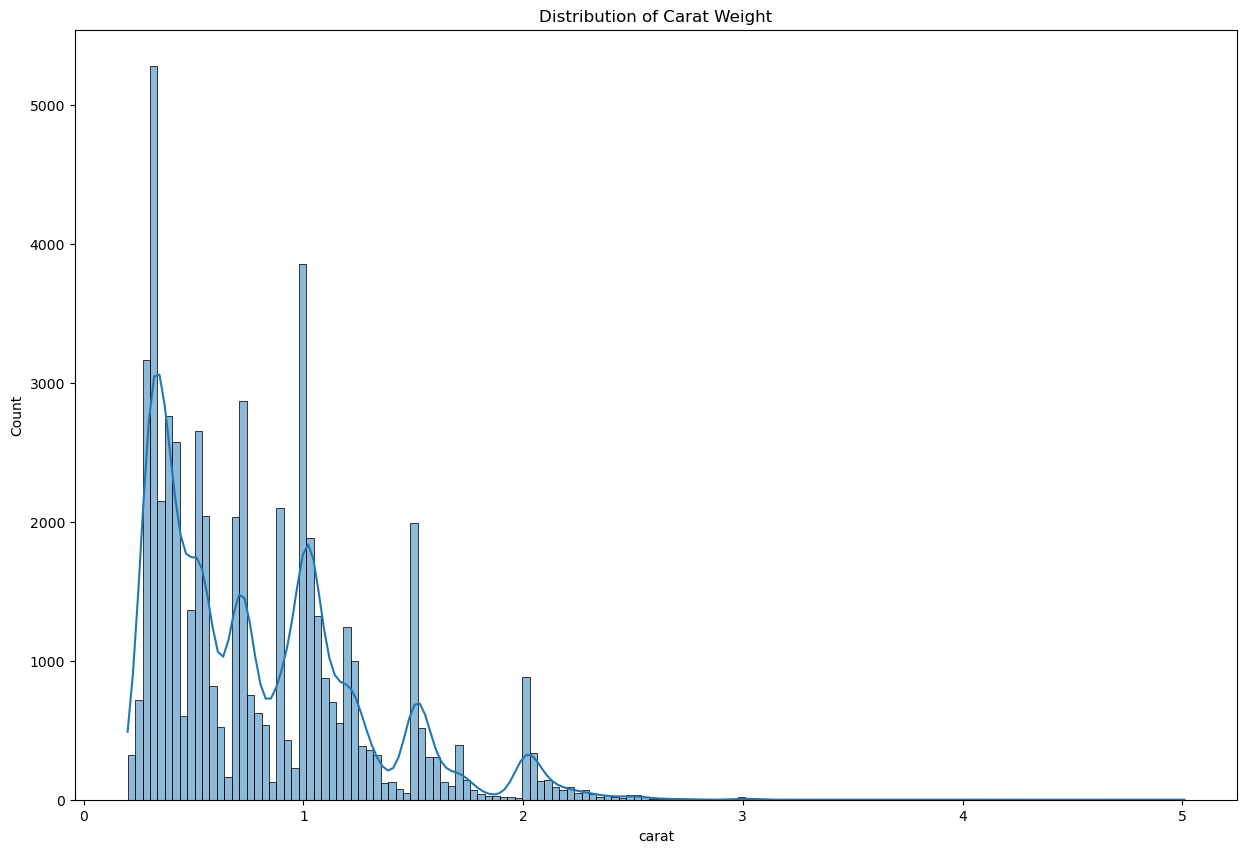

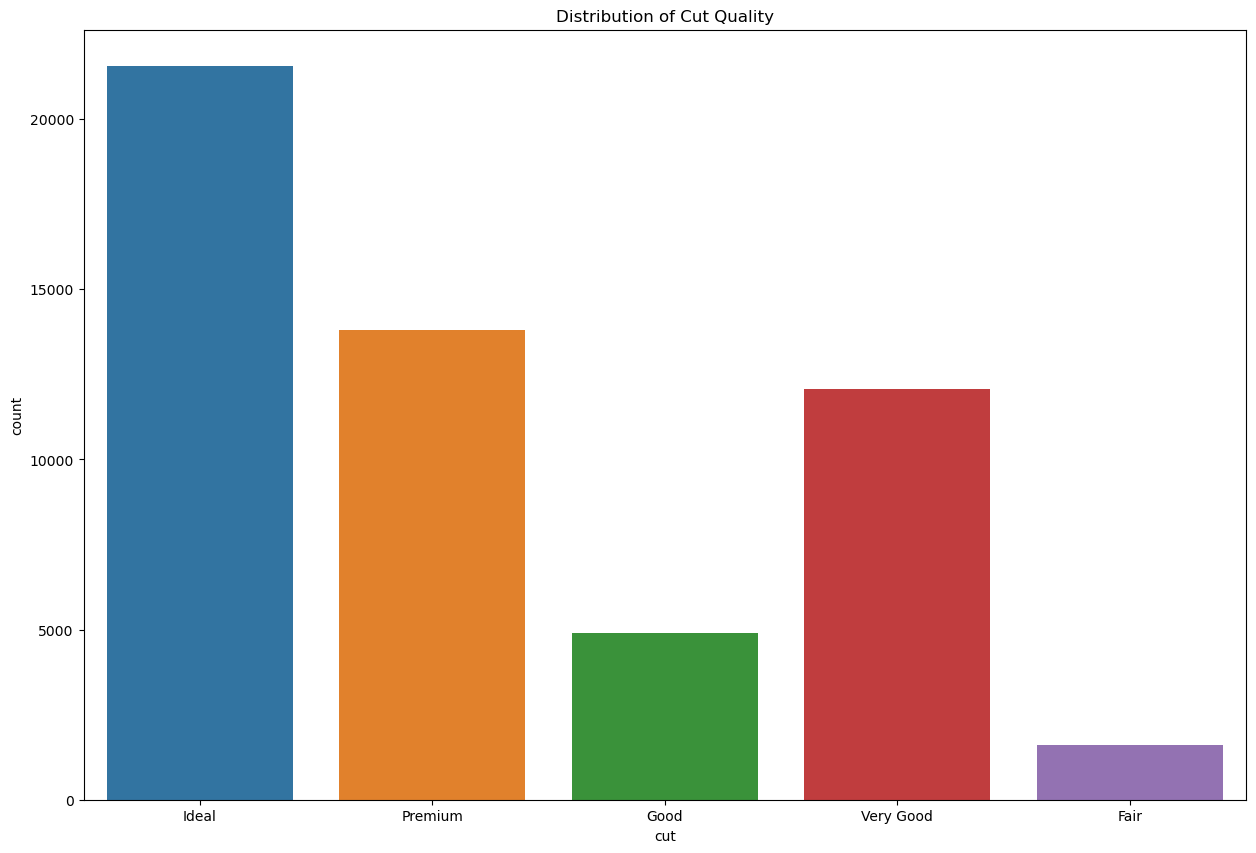

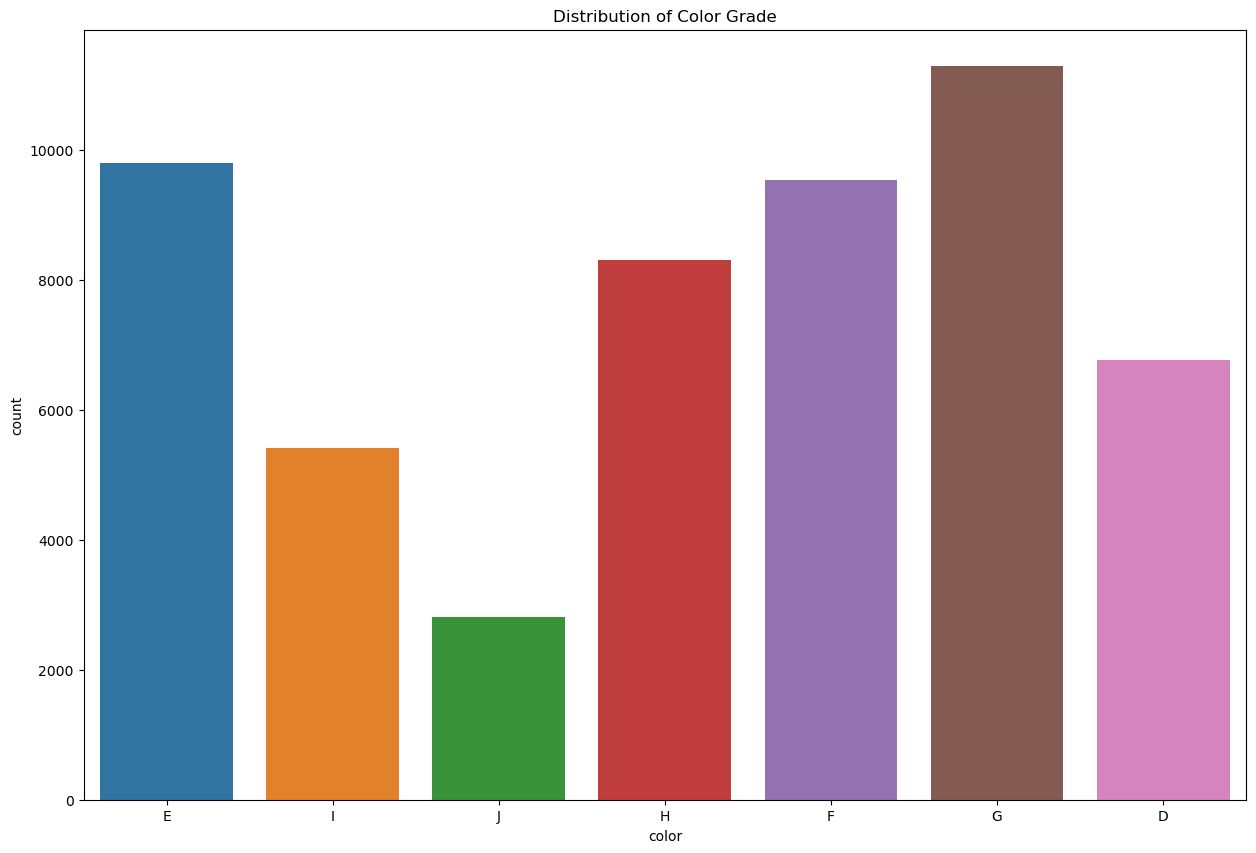

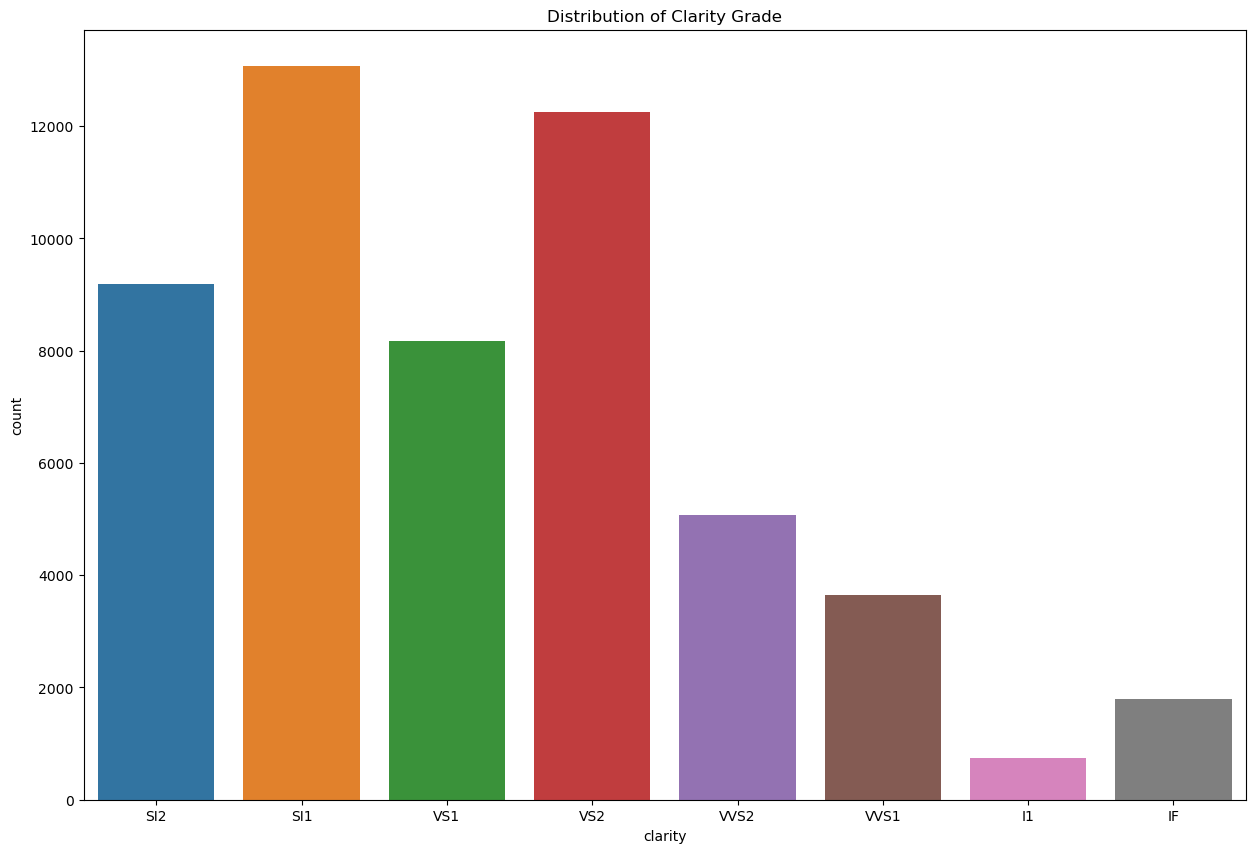

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

# Load the dataset
df = pd.read_csv("C:/Users/thoma/Downloads/Diamonds/Diamonds/diamonds.csv")


print(df.head())

# Summary statistics
print(df.describe())


print(df.isnull().sum())


plt.figure(figsize=(15,10))
sns.histplot(df['carat'], kde=True)
plt.title('Distribution of Carat Weight')
plt.show()

plt.figure(figsize=(15,10))
sns.countplot(x='cut', data=df)
plt.title('Distribution of Cut Quality')
plt.show()

plt.figure(figsize=(15,10))
sns.countplot(x='color', data=df)
plt.title('Distribution of Color Grade')
plt.show()

plt.figure(figsize=(15,10))
sns.countplot(x='clarity', data=df)
plt.title('Distribution of Clarity Grade')
plt.show()

### 2. Data Cleaning:

In [8]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['cut', 'color', 'clarity']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### 3. Data Splitting:

Split the data into training and testing sets.

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Model Building:

Implement the K-Means clustering algorithm.

C:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

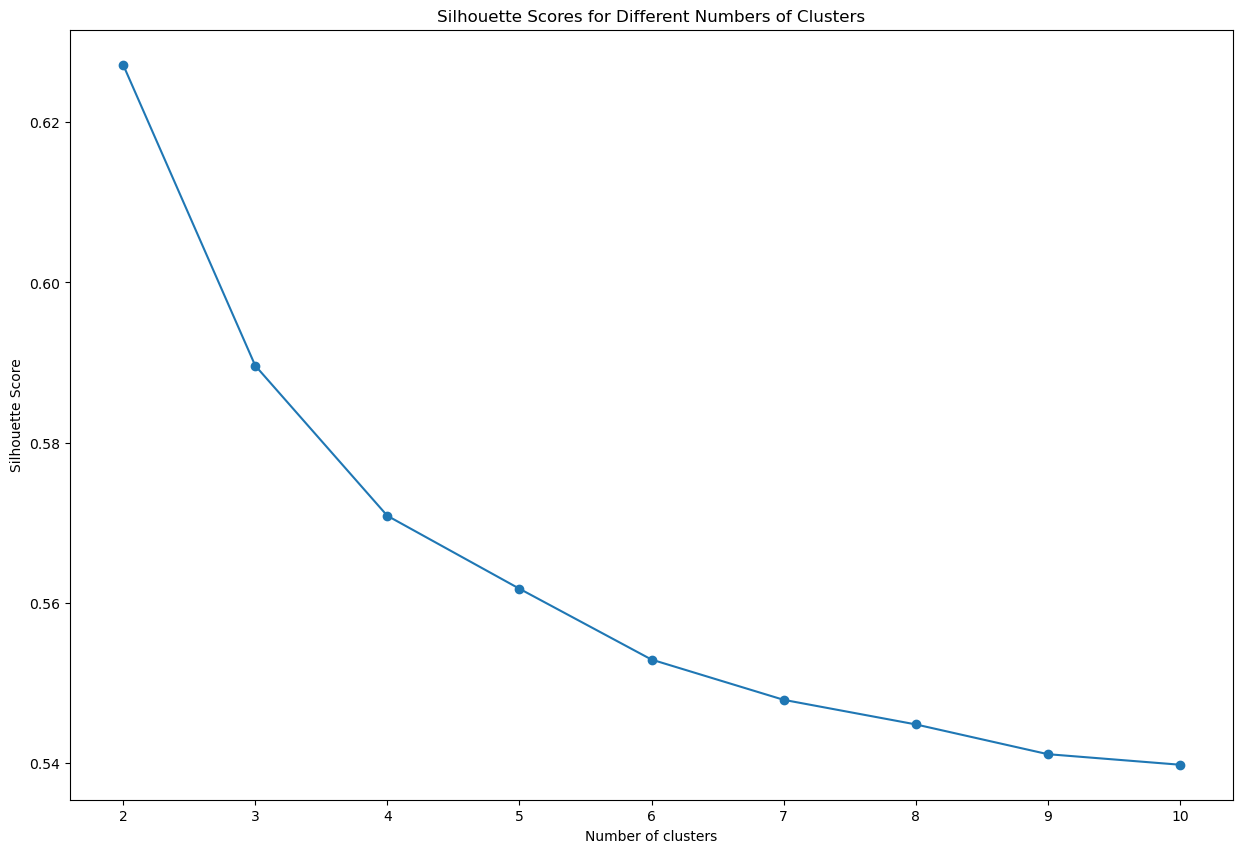

KMeans(n_clusters=4, n_init=10, random_state=42)

In [11]:
# Find the optimal number of clusters using the silhouette score
silhouette_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, preds))


plt.figure(figsize=(15, 10))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_n_clusters = 4
kmeans = KMeans(n_clusters=best_n_clusters, n_init=10, random_state=42)
kmeans.fit(X_train)

### 5. Model Evaluation:

Evaluate the clustering performance.
Visualize the clusters.

In [12]:
train_preds = kmeans.predict(X_train)
test_preds = kmeans.predict(X_test)

### 6. Save the Model:

Save the final model for future use.

In [13]:
# Save the model
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

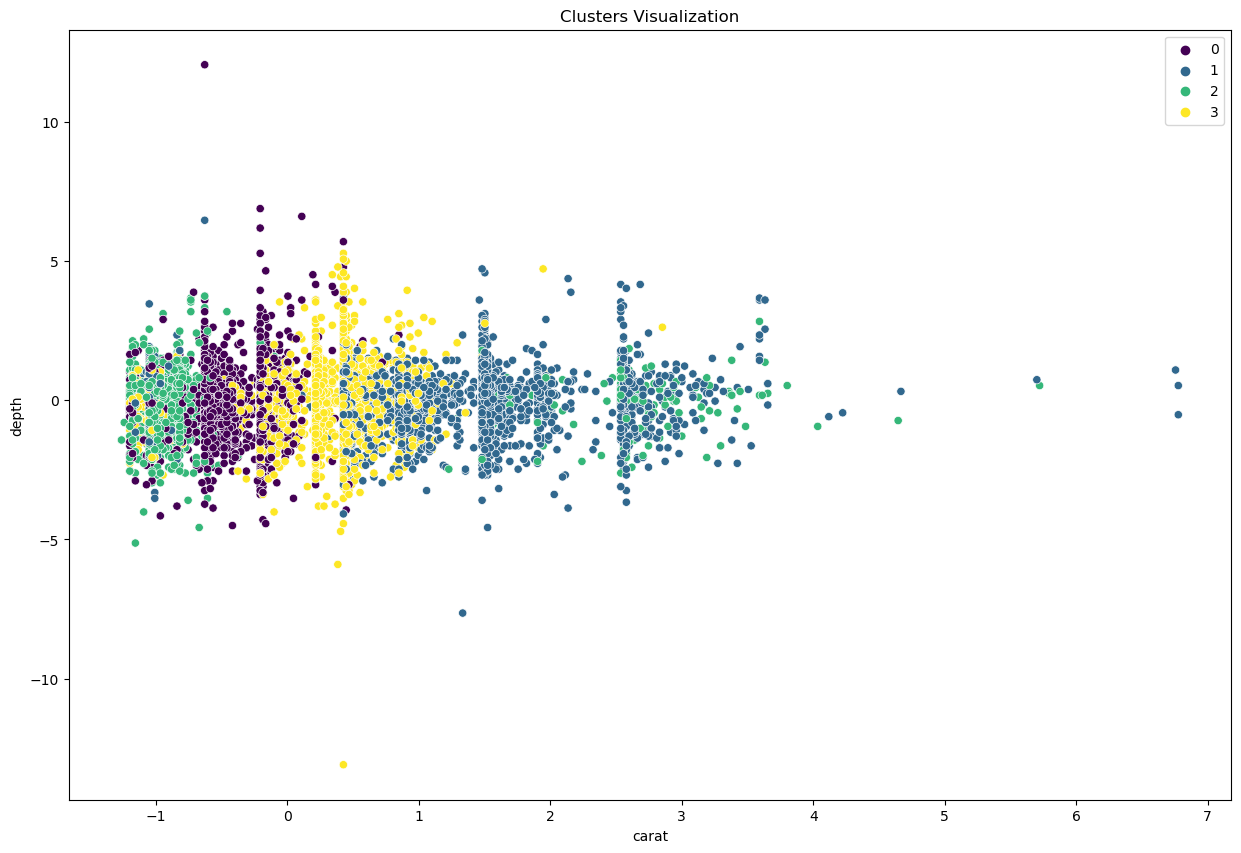

In [14]:
# Visualize the clusters
plt.figure(figsize=(15, 10))
sns.scatterplot(x=X_test['carat'], y=X_test['depth'], hue=test_preds, palette='viridis')
plt.title('Clusters Visualization')
plt.show()


# Subject 4:
#### The task involves analyzing a diabetes dataset to predict the likelihood of diabetes occurrence using various features like pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function, and age. The goal is to classify individuals into groups indicating their risk of diabetes onset. This will be achieved by applying the K Nearest Neighbors (KNN) algorithm for classification based on their health status.


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from sklearn.model_selection import GridSearchCV



data = pd.read_csv("C:/Users/thoma/Downloads/Diabetes/Diabetes/diabetes.csv")


print("Dataset info:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())


print("\nMissing values:")
print(data.isnull().sum())


data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, data.mean())


X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn_classifier = KNeighborsClassifier()


param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

knn_classifier = grid_search.best_estimator_
knn_classifier.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the Model
joblib.dump(knn_classifier, 'diabetes_knn_model.pkl')


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66       

['diabetes_knn_model.pkl']

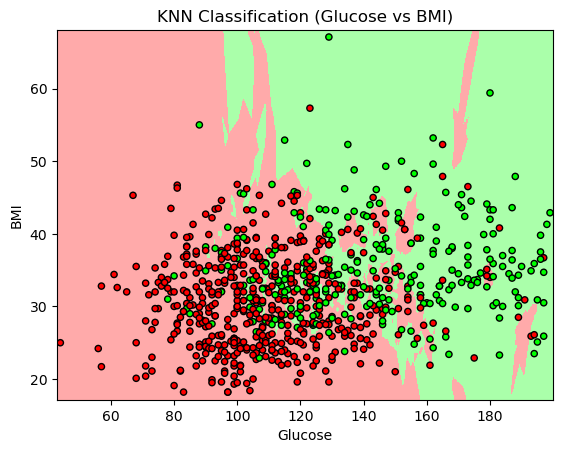

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

feature1 = 'Glucose'
feature2 = 'BMI'

feature1_idx = X.columns.get_loc(feature1)
feature2_idx = X.columns.get_loc(feature2)

X_visualize = X.values[:, [feature1_idx, feature2_idx]]

# Train KNN classifier on the chosen features
knn_classifier.fit(X_visualize, y)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_visualize[:, 0].min() - 1, X_visualize[:, 0].max() + 1
y_min, y_max = X_visualize[:, 1].min() - 1, X_visualize[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Plot the decision boundary and training points
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_visualize[:, 0], X_visualize[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("KNN Classification ({} vs {})".format(feature1, feature2))
plt.show()
